In [ ]:
CODE FOR PCA

In [3]:
pip install pandas numpy scikit-learn matplotlib openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
# Using raw string notation
import pandas as pd
file_path = r"C:\Users\munag\OneDrive\Desktop\Mentor Together\M2G Dataset\Cleaned_Dataset.xlsx"
  # Change to your actual file path
df = pd.read_excel(file_path, engine='openpyxl')


In [5]:
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])

In [6]:
df_numeric.fillna(df_numeric.median(), inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

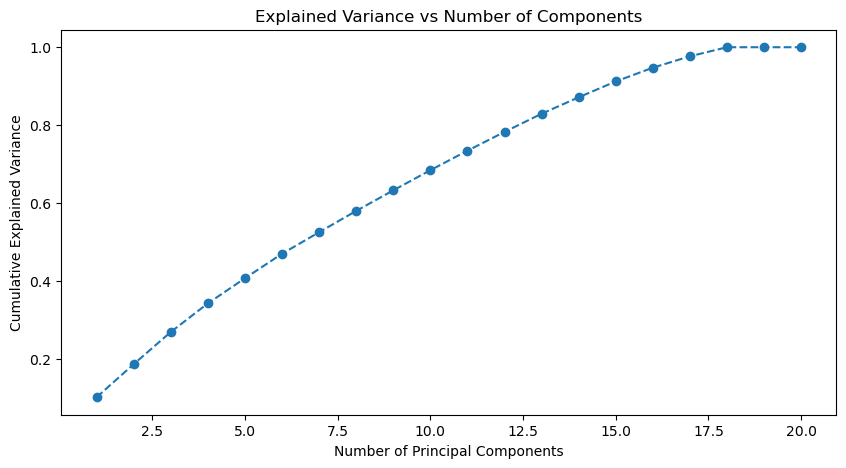

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()

pca_result = pca.fit_transform(df_scaled)

# Explained variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()


In [12]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1  # 95% variance
print(f"Optimal number of components: {n_components}")


Optimal number of components: 17


In [13]:
pca_final = PCA(n_components=n_components)
df_pca = pca_final.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Save reduced dataset
df_pca.to_excel("Reduced_Dataset.xlsx", index=False)
print("Reduced dataset saved as 'Reduced_Dataset.xlsx'")


Reduced dataset saved as 'Reduced_Dataset.xlsx'


In [14]:
import pandas as pd

# Load the reduced dataset
df_pca = pd.read_excel("Reduced_Dataset.xlsx", engine='openpyxl')

# Display the first few rows
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1.105330,0.140789,-0.604973,0.182502,0.184084,-0.053229,-0.184031,0.229347,0.114162,0.253013,-0.444416,-0.587179,-0.081130,0.008921,0.823695,-0.447555,-0.149198
1,1.111315,0.287291,-0.435445,-0.148173,-0.295406,0.027515,-1.121356,-0.244271,0.659219,0.556429,0.122432,-0.725367,0.977841,-0.134844,1.075429,-0.191248,-0.364824
2,0.935361,0.203754,-0.931744,-0.877121,-0.291846,0.307497,-0.770084,-0.258040,0.699606,0.357986,0.178288,-0.161908,1.044752,-0.842773,0.716356,0.633078,-0.152755
3,1.448020,-1.199813,-0.630390,0.159950,-0.257863,0.332966,0.761682,-1.686979,1.947670,1.315928,0.355172,0.405342,0.542128,-0.023807,-0.648261,0.997412,-0.505063
4,1.110216,0.287732,-0.436487,-0.146695,-0.294254,0.027349,-1.115915,-0.240694,0.656056,0.553381,0.120346,-0.723521,0.972519,-0.133372,1.075882,-0.192591,-0.365311


In [15]:
df_pca.columns


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'],
      dtype='object')

In [16]:
import os
print(os.getcwd())  # This prints the current working directory


C:\Users\munag


In [1]:
import pandas as pd
import joblib  # To load your trained model


In [9]:
file_path=r"C:\Users\munag\OneDrive\Desktop\Mentor Together\M2G Dataset\Test Set for Project - 200 Records 75 Attributes.xlsx"

# Or use one of the other methods mentioned
# Path to your uploaded file
df_test = pd.read_excel(file_path)

# Display first few rows
df_test.head()


,Record Serial Number,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,OUTCOME
0,1,33,1,4,3,8,0,3,2,4,...,0,0,0,0,0,0,0,0,0,0
1,2,12,1,3,2,3,0,3,3,3,...,0,0,0,0,0,0,0,0,0,1
2,3,39,1,4,2,9,2,0,2,5,...,0,0,0,0,0,0,0,0,0,0
3,4,8,1,3,3,2,0,5,3,2,...,0,0,0,0,0,0,0,0,2,0
4,5,33,1,2,4,8,0,2,0,7,...,1,0,0,0,0,0,0,0,0,0


In [19]:
# Check the column names
print(df_test.columns)

# Strip any leading/trailing spaces
df_test.columns = df_test.columns.str.strip()

# Check if 'age' exists in the columns
if 'MGEMLEEF' in df_test.columns:
    df_test['MGEMLEEF'] = df_test['MGEMLEEF'].astype(int)
else:
    print("Column 'MGEMLEEF' not found in DataFrame.")


Index(['Record Serial Number', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF',
       'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA',
       'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD',
       'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG',
       'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR',
       'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30',
       'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA',
       'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
       'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN',
       'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER',
       'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND',
       'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR',
       'AWERKT', 'ABROM', 'OUTCOME'],
      dtype='object')


In [20]:
X_test = df_test[['MGEMLEEF', 'MINKGEM']]  # Adjust columns accordingly


In [22]:
import pandas as pd  

# Load test results
df_results = pd.read_excel("Reduced_Dataset.xlsx")

# Display the first few rows
df_results.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,1.105330,0.140789,-0.604973,0.182502,0.184084,-0.053229,-0.184031,0.229347,0.114162,0.253013,-0.444416,-0.587179,-0.081130,0.008921,0.823695,-0.447555,-0.149198
1,1.111315,0.287291,-0.435445,-0.148173,-0.295406,0.027515,-1.121356,-0.244271,0.659219,0.556429,0.122432,-0.725367,0.977841,-0.134844,1.075429,-0.191248,-0.364824
2,0.935361,0.203754,-0.931744,-0.877121,-0.291846,0.307497,-0.770084,-0.258040,0.699606,0.357986,0.178288,-0.161908,1.044752,-0.842773,0.716356,0.633078,-0.152755
3,1.448020,-1.199813,-0.630390,0.159950,-0.257863,0.332966,0.761682,-1.686979,1.947670,1.315928,0.355172,0.405342,0.542128,-0.023807,-0.648261,0.997412,-0.505063
4,1.110216,0.287732,-0.436487,-0.146695,-0.294254,0.027349,-1.115915,-0.240694,0.656056,0.553381,0.120346,-0.723521,0.972519,-0.133372,1.075882,-0.192591,-0.365311
